# Exploratory analysis of electricity rates
Data downloaded from https://www.kaggle.com/datasets/alistairking/electricity-prices and stored as an xlsx file

State codes copied from https://www.faa.gov/air_traffic/publications/atpubs/cnt_html/appendix_a.html and added as a new sheet in xlsx file above

In [31]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
xls = pd.ExcelFile('electricity_prices.xlsx')
df_prices=pd.read_excel(xls,'prices')
df_codes=pd.read_excel(xls,'codes')
df_prices

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,NaN,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,NaN,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,NaN,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,NaN,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,NaN,6.01,15.07136,250.60591
...,...,...,...,...,...,...,...,...
85865,2024,1,Arkansas,all sectors,1717720.0,9.63,442.98773,4598.63147
85866,2024,1,Arkansas,commercial,208669.0,10.26,97.79467,953.02154
85867,2024,1,Arkansas,industrial,34951.0,7.08,109.92656,1553.02838
85868,2024,1,Arkansas,residential,1474098.0,11.24,235.26399,2092.56172


In [37]:
state_codes_dict = df_codes.set_index('State').T.to_dict('records')[0]

In [4]:
df_prices.stateDescription.unique()

array(['Wyoming', 'New England', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Alabama', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Middle Atlantic', 'Pacific Contiguous',
       'Pacific Noncontiguous', 'U.S. Total', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Rhode Island', 'Alaska', 'Arizona', 'Georgia', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'East North Central',
       'West North Central', 'South Atlantic', 'East South Central',
       'West South Central', 'Mountain', 'Pennsylvania'], dtype=object)

In [5]:
region_list = [i for i in df_prices.stateDescription.unique() if not i in df_codes.State.unique()]

In [6]:
df_prices  = df_prices.loc[df_prices.stateDescription.isin(df_codes.State.unique())]


In [7]:
df_prices=df_prices.replace({'stateDescription':state_codes_dict})
#df_prices['state']=df_prices.stateDescription.apply(lambda x : df_codes.loc[df_codes.State==x].shorthand.tolist()[0])


In [8]:
#df_prices.loc[:,'stateDescription']
df_prices=df_prices.rename(columns={'stateDescription':'state'})


In [9]:
df_prices['date']=pd.to_datetime(df_prices.year.astype('str')+'-'+df_prices.month.astype('str'))

In [11]:
df_prices=df_prices.loc[df_prices.year<2024].drop(['year','month'],axis=1).rename(columns={'sectorName':'sector'})

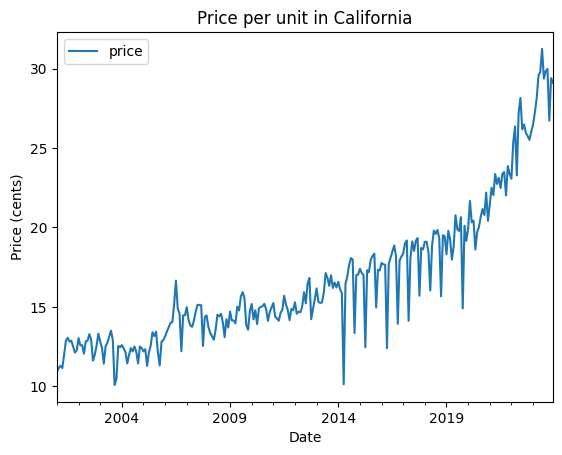

In [27]:
df_prices.loc[df_prices.sector=='residential'].loc[df_prices.state=='CA'].plot(kind='line',x='date',y='price',xlabel='Date',ylabel='Price (cents)',title='Price per unit in California');


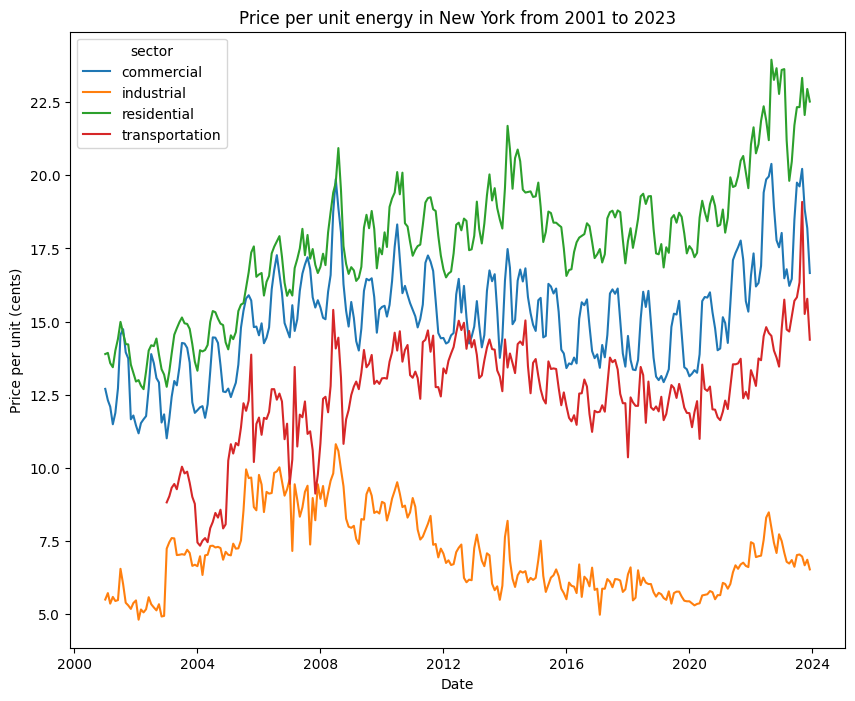

In [42]:
fig,ax=plt.subplots(figsize=(10,8))
state_sel='New York'
sns.lineplot(ax=ax,data=df_prices.loc[df_prices.state==state_codes_dict[state_sel]].loc[df_prices.sector.isin(['commercial','residential','industrial','transportation'])],x='date',y='price',hue='sector');
ax.set_title('Price per unit energy in {} from 2001 to 2023'.format(state_sel));
ax.set_xlabel('Date');
ax.set_ylabel('Price per unit (cents)');

#ax.set(yscale="log")
